In [1]:
import splitfolders
from tensorflow import keras
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D,Flatten,Activation
from tensorflow.keras import regularizers

In [2]:
#input_folder = 'image_data/'

In [3]:
#splitfolders.ratio(input_folder,output="image_dataset",seed=42,ratio=(.7, .2, .1),group_prefix=None)

In [4]:
train_directory = 'image_dataset/train'
test_directory = 'image_dataset/test'
val_directory = 'image_dataset/val'

In [5]:
train_generator = ImageDataGenerator(rescale=1/255).flow_from_directory(
    train_directory,
    target_size=(224,224),
    color_mode='rgb',
    batch_size=64,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=42
)
validation_generator = ImageDataGenerator(rescale=1/255).flow_from_directory(
    val_directory,
    target_size=(224,224),
    color_mode='rgb',
    batch_size=64,
    class_mode='categorical',
    shuffle=True,
    seed=42
   
    
)

test_generator = ImageDataGenerator(rescale=1/255).flow_from_directory(
test_directory,
target_size=(224,224), 
color_mode='rgb', 
batch_size=64, 
class_mode='categorical',    
shuffle=False
)


Found 2277 images belonging to 4 classes.
Found 649 images belonging to 4 classes.
Found 330 images belonging to 4 classes.


In [6]:

model = Sequential()
model.add(Conv2D(16, kernel_size=(3,3), activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(3,3))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(3,3))
model.add(Conv2D(224, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(3,3))
model.add(Flatten())

model.add(Dense(16, kernel_regularizer=regularizers.l2(l2=0.01)))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer=keras.optimizers.Adam(learning_rate=(0.001)),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
rlrop = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10)
history = model.fit(train_generator,
          steps_per_epoch=10,
          batch_size=64,
          epochs=30,
          callbacks=[rlrop],          
          validation_data=validation_generator
         )          

Epoch 1/30
10/10 [==============================] - 23s 2s/step - loss: 1.5347 - accuracy: 0.3266 - val_loss: 1.3718 - val_accuracy: 0.3790 - lr: 0.0010
Epoch 2/30
10/10 [==============================] - 22s 2s/step - loss: 1.1258 - accuracy: 0.6562 - val_loss: 0.8334 - val_accuracy: 0.7088 - lr: 0.0010
Epoch 3/30
10/10 [==============================] - 23s 2s/step - loss: 0.7387 - accuracy: 0.7734 - val_loss: 0.8764 - val_accuracy: 0.7396 - lr: 0.0010
Epoch 4/30
10/10 [==============================] - 24s 2s/step - loss: 0.7585 - accuracy: 0.7423 - val_loss: 0.7008 - val_accuracy: 0.7781 - lr: 0.0010
Epoch 5/30
10/10 [==============================] - 25s 3s/step - loss: 0.6513 - accuracy: 0.7766 - val_loss: 0.6383 - val_accuracy: 0.7766 - lr: 0.0010
Epoch 6/30
10/10 [==============================] - 27s 3s/step - loss: 0.5711 - accuracy: 0.8344 - val_loss: 0.6199 - val_accuracy: 0.8028 - lr: 0.0010
Epoch 7/30
10/10 [==============================] - 27s 3s/step - loss: 0.5483 - a

In [7]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

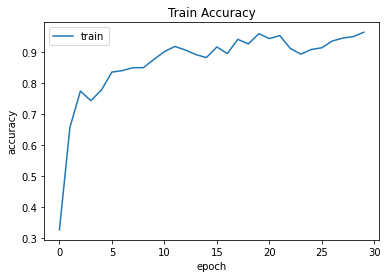

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.title('Train Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

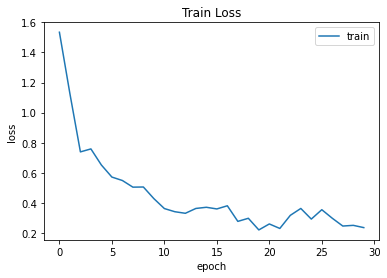

In [9]:
plt.plot(history.history['loss'])
plt.title('Train Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper right')
plt.show()

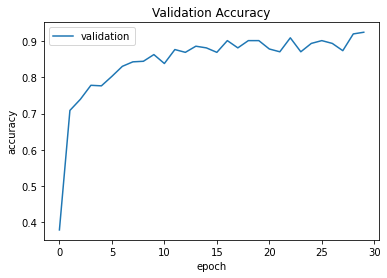

In [10]:
plt.plot(history.history['val_accuracy'])
plt.title('Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['validation'],loc='upper left')
plt.show()

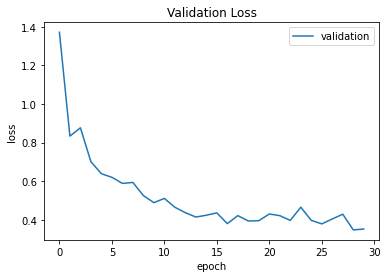

In [11]:
plt.plot(history.history['val_loss'])
plt.title('Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['validation'],loc='upper right')
plt.show()

In [12]:
model.evaluate(test_generator)

6/6 [==============================] - 3s 516ms/step - loss: 0.3341 - accuracy: 0.9333


[0.33409449458122253, 0.9333333373069763]

In [13]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

pred = model.predict(test_generator)
pred_classes = [np.argmax(element) for element in pred]

true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

report = classification_report(true_classes, pred_classes, target_names = class_labels)
print(report)

              precision    recall  f1-score   support

      Benign       0.87      0.90      0.89        52
       Early       0.92      0.94      0.93        99
         Pre       0.93      0.94      0.93        97
         Pro       1.00      0.94      0.97        82

    accuracy                           0.93       330
   macro avg       0.93      0.93      0.93       330
weighted avg       0.93      0.93      0.93       330

